<a href="https://colab.research.google.com/github/lauramoraes/Analise_de_Clusters/blob/master/2%20-%20Redu%C3%A7%C3%A3o%20de%20dimensionalidade%20(toy%20example).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Redução de dimensionalidade (exemplo sintético)

In [0]:
import numpy as np

# Função para normalizar os vetores
def normalize(v):
    norm = np.linalg.norm(v)
    return v / norm

#### Gerando dados sintéticos

In [0]:
# Generate some data that lies along a line
numpoints=100
x = np.mgrid[-2:5:100j]
y = np.mgrid[1:9:100j]
z = np.mgrid[-5:3:100j]

data = np.concatenate((x[:, np.newaxis], 
                       y[:, np.newaxis], 
                       z[:, np.newaxis]), 
                      axis=1)

# Perturb with some Gaussian noise
data += np.random.normal(size=data.shape) * 0.2

# Calculate the mean of the points, i.e. the 'center' of the cloud
datamean = data.mean(axis=0)

#### Calculando SVD/PCA

In [0]:
# Do an SVD on the mean-centered data using Numpy
# uu, dd, vv = np.linalg.svd(data - datamean)

# Let's calculate using our algorithm
At=data-datamean
A=np.transpose(At)
v1=[7,4,1]
v1=normalize(v1)

# Iterate 100 times to decrease error
for x in range(0, 100):
  u1 = normalize(At@v1)
  v1 = normalize(A@u1)
  
v2=[1,1,1]
v2=normalize((v2@v1)*v1-v2)  # vetor perpendicular a v1
print(v1@v2)

for x in range(0, 100):
  u2 = At@v2
  u2 = normalize((u2@u1)*u1-u2)
  v2=A@u2
  v2 =normalize((v2@v1)*v1-v2) 

6.106226635438361e-15


#### Plot dos resultados

In [0]:
# Now v1 contains the first principal component, i.e. the direction
# vector of the 'best fit' line in the least squares sense.

# Now generate some points along this best fit line, for plotting.

# I use -7, 7 since the spread of the data is roughly 14
# and we want it to have mean 0 (like the points we did
# the svd on). Also, it's a straight line, so we only need 2 points.
linepts1 = v1 * np.mgrid[-7:7:2j][:, np.newaxis]
linepts2 = v2 * np.mgrid[-7:7:2j][:, np.newaxis]

# shift by the mean to get the line in the right place
linepts1 += datamean
linepts2 += datamean

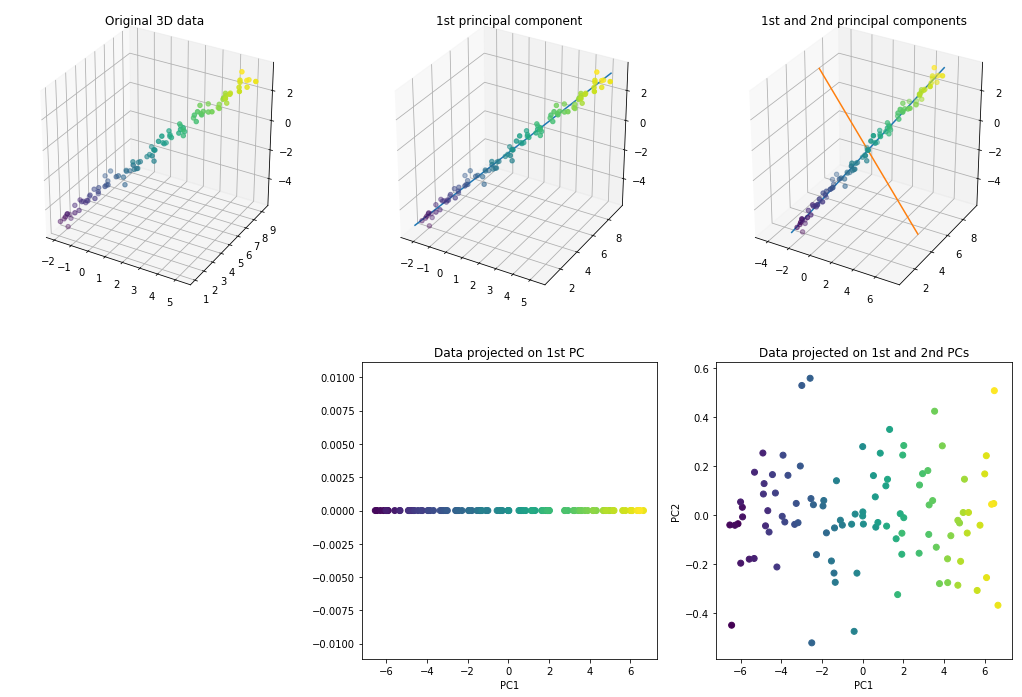

In [0]:
# Verify that everything looks right.
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as m3d
import matplotlib.cm as cmx

# Let's add some color to it
cm = plt.get_cmap('jet')
col = np.arange(data.shape[0])

fig = plt.figure(figsize=(18,12))
ax3Draw = fig.add_subplot(231, projection='3d')
# Plot raw data
ax3Draw.scatter3D(*data.T, c=col)
ax3Draw.set_title("Original 3D data")

# Plot 3D with one component
ax3Dpc1 = fig.add_subplot(232, projection='3d')
ax3Dpc1.scatter3D(*data.T, c=col)
ax3Dpc1.plot3D(*linepts1.T)
ax3Dpc1.set_title("1st principal component")

# Plot 3D with two components
ax3Dpc2 = fig.add_subplot(233, projection='3d')
ax3Dpc2.scatter3D(*data.T, c=col)
ax3Dpc2.plot3D(*linepts1.T)
ax3Dpc2.plot3D(*linepts2.T)
ax3Dpc2.set_title("1st and 2nd principal components")

# Plot 2D projection of first component
axPc1 = fig.add_subplot(235)
axPc1.scatter(At@v1, (At@v1).shape[0] * [0], c=col)
axPc1.set_title("Data projected on 1st PC")
axPc1.set_xlabel("PC1")

# Plot 2D projection of first and second components
axPc2 = fig.add_subplot(236)
axPc2.scatter(At@v1, At@v2, c=col)
axPc2.set_title("Data projected on 1st and 2nd PCs")
axPc2.set_xlabel("PC1")
axPc2.set_ylabel("PC2")

plt.show()